In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/diabetes.csv.xls')

In [ ]:
  data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
columns_with_zero_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zero_values:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(data[column].mean(), inplace=True)

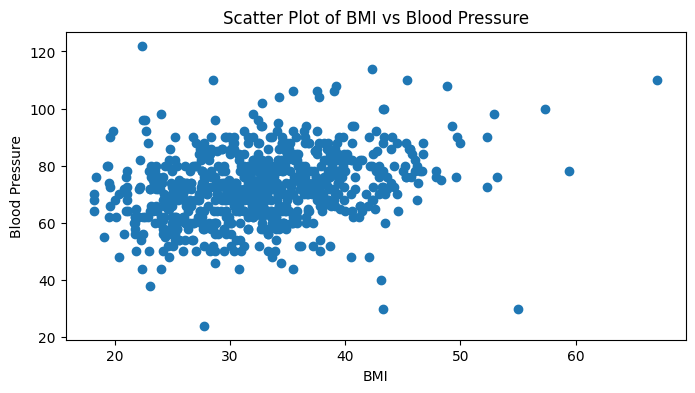

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(data['BMI'], data['BloodPressure'])
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('Scatter Plot of BMI vs Blood Pressure')
plt.show()


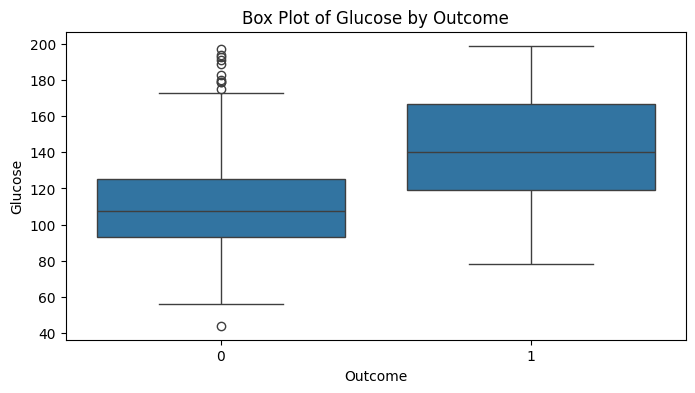

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.title('Box Plot of Glucose by Outcome')
plt.show()

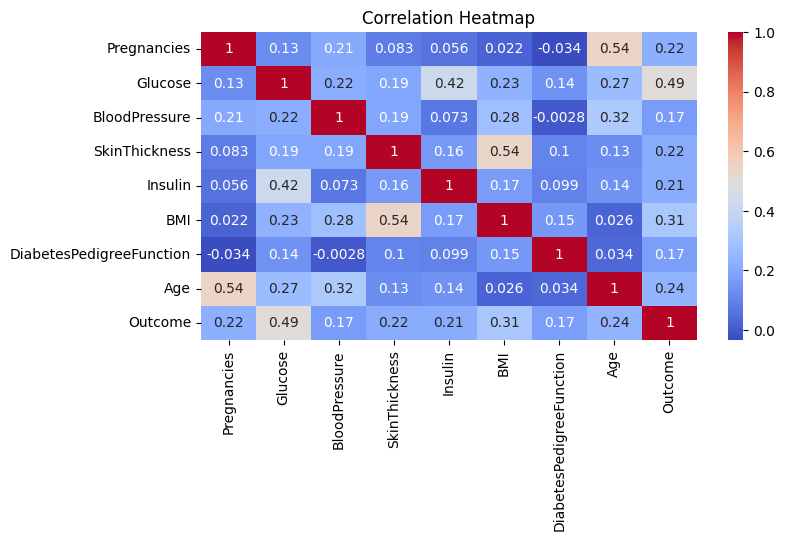

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

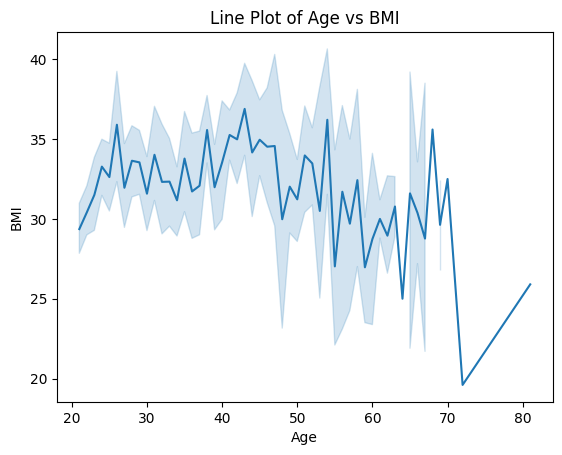

In [14]:
sns.lineplot(x="Age", y="BMI", data=data)
plt.title('Line Plot of Age vs BMI')
plt.show()

In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
x=data[['Age','BMI','Glucose','BloodPressure','SkinThickness','Insulin']]
y=data['Outcome']
data.describe()
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [16]:
x_scaled

array([[ 1.42599540e+00,  1.66291742e-01,  8.65108070e-01,
        -3.35182392e-02,  6.65502121e-01, -3.34507888e-16],
       [-1.90671905e-01, -8.52531177e-01, -1.20616153e+00,
        -5.29859033e-01, -1.74633816e-02, -3.34507888e-16],
       [-1.05584152e-01, -1.33283341e+00,  2.01581340e+00,
        -6.95305964e-01,  8.08793628e-16, -3.34507888e-16],
       ...,
       [-2.75759658e-01, -9.10749630e-01, -2.25789027e-02,
        -3.35182392e-02, -7.00428884e-01, -5.12538638e-01],
       [ 1.17073215e+00, -3.43119717e-01,  1.41807574e-01,
        -1.02619983e+00,  8.08793628e-16, -3.34507888e-16],
       [-8.71373930e-01, -2.99455878e-01, -9.43143171e-01,
        -1.98965170e-01,  2.10191786e-01, -3.34507888e-16]])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_pred_log_reg=model.predict(x_test)

In [ ]:
y_pred_log_reg

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg_accuracy=accuracy_score(y_test,y_pred_log_reg)
logreg_confusion_matrix=confusion_matrix(y_test,y_pred_log_reg)
print("Accuracy:",logreg_accuracy*100)
print("Confusion Matrix:",logreg_confusion_matrix)

Accuracy: 79.22077922077922
Confusion Matrix: [[96 11]
 [21 26]]


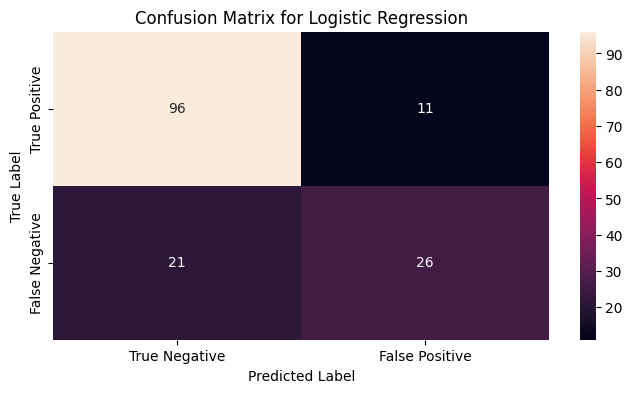

In [23]:
plt.figure(figsize=(8, 4))
sns.heatmap(logreg_confusion_matrix, annot=True, fmt="d", xticklabels=["True Negative", "False Positive"], yticklabels=["True Positive", "False Negative"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [24]:
logreg_classification_report=classification_report(y_test,y_pred_log_reg)
print("Classification Report:",logreg_classification_report)
# see formula of precision recall f1-score support


Classification Report:               precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



In [25]:

from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=200,random_state=42)
random_forest_model.fit(x_train, y_train)

y_pred_random_forest = random_forest_model.predict(x_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy Random Forest:", accuracy_random_forest)


Accuracy Random Forest: 0.7792207792207793


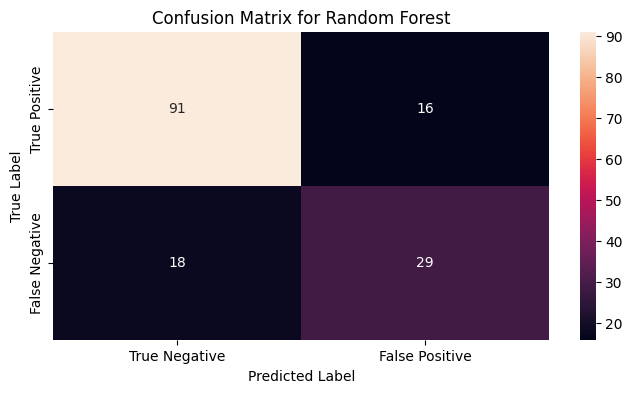

In [27]:
from sklearn.metrics import classification_report
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_random_forest), annot=True, fmt="d", xticklabels=["True Negative", "False Positive"], yticklabels=["True Positive", "False Negative"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.64      0.62      0.63        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.78      0.78      0.78       154



In [29]:
print("Logistic regression accuracy:", logreg_accuracy*100)
print("Random Forest accuracy:", accuracy_random_forest*100)

Logistic regression accuracy: 79.22077922077922
Random Forest accuracy: 77.92207792207793


In [30]:
import pickle
filename='finalized_model.pkl'
with open(filename,'wb') as file:
  pickle.dump(model,file)
  # another way
# pickle.dump(model,open(filename,'wb'))

In [31]:
with open(filename,'rb') as file:
  loaded_model=pickle.load(file)

In [32]:
def predict_diabetes(input_data):
  input_data_scaled = scaler.transform([input_data])
  prediction = loaded_model.predict(input_data_scaled)
  if prediction[0] == 1:
    return " Diabetic"
  else:
    return "Not Diabetic"

In [35]:
input=[6,148,72,35,0,33.6]
result=predict_diabetes(input)
print(result)

 Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
